# Logistic Regression

#### Build logistic regression model to understand the election dataset and identify whether the candidate win or lose election based on 'amount spent' and 'popularity rank'.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
election_df = pd.read_csv(r"D:\360digi\DS\Sharath\Logistic_Regression_1\handson\Datasets-Day32-Logistic Regression\election_data.csv")
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Election-id      10 non-null     float64
 1   Result           10 non-null     float64
 2   Year             10 non-null     float64
 3   Amount Spent     10 non-null     float64
 4   Popularity Rank  10 non-null     float64
dtypes: float64(5)
memory usage: 568.0 bytes


In [4]:
election_df.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [5]:
# dropping columns
election_df.drop(["Election-id", "Year"], axis = 1, inplace = True)

In [6]:
election_df

,Result,Amount Spent,Popularity Rank
0,NaN,NaN,NaN
1,0.0,3.81,3.0
2,1.0,6.32,2.0
3,1.0,3.67,1.0
4,0.0,2.93,4.0
5,1.0,3.60,1.0
6,0.0,4.20,4.0
7,1.0,5.66,2.0
8,1.0,4.32,3.0
9,1.0,3.26,3.0


In [7]:
election_df.isna().sum()

Result             1
Amount Spent       1
Popularity Rank    1
dtype: int64

In [8]:
#delete the row data

In [9]:
election_df = election_df.drop(index = 0).reset_index(drop=True)

In [10]:
election_df.isnull().sum()

Result             0
Amount Spent       0
Popularity Rank    0
dtype: int64

In [11]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Result           10 non-null     float64
 1   Amount Spent     10 non-null     float64
 2   Popularity Rank  10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


In [12]:
# change the datatype 
election_df = pd.DataFrame(election_df.astype(int))

In [13]:
# Seperating input and output variables 
X = pd.DataFrame(election_df.iloc[:, 1:])
Y = pd.DataFrame(election_df.iloc[:, 0])

In [14]:
X.describe()

,Amount Spent,Popularity Rank
count,10.000000,10.000000
mean,3.700000,2.700000
std,1.159502,1.159502
min,2.000000,1.000000
25%,3.000000,2.000000
50%,3.500000,3.000000
75%,4.000000,3.750000
max,6.000000,4.000000


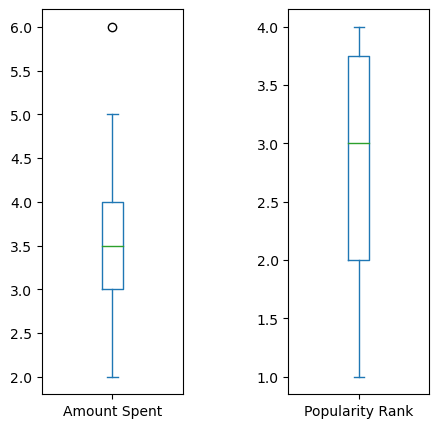

In [15]:
# box plot visualisation
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [16]:
# Segregating data based on their data types
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['Amount Spent', 'Popularity Rank'], dtype='object')

In [17]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Amount Spent', 'Popularity Rank'])

In [18]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Amount Spent', 'Popularity Rank']))])

In [19]:
preprocessor = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Amount '
                                                                        'Spent',
                                                                        'Popularity '
                                                                        'Rank']))]),
                                 Index(['Amount Spent', 'Popularity Rank'], dtype='object'))])


In [20]:
clean = preprocessor.fit(X)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Amount '
                                                                        'Spent',
                                                                        'Popularity '
                                                                        'Rank']))]),
                                 Index(['Amount Spent', 'Popularity Rank'], dtype='object'))])

In [21]:
cleandata1 = pd.DataFrame(clean.transform(X), columns = numeric_features)
cleandata1.head()

,Amount Spent,Popularity Rank
0,3.0,3.0
1,5.5,2.0
2,3.0,1.0
3,2.0,4.0
4,3.0,1.0


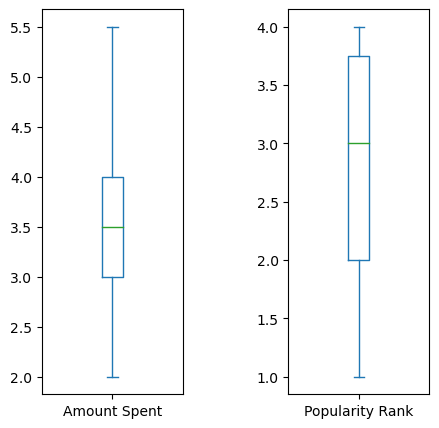

In [22]:
# box plot visualisation
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [23]:
cleandata1.describe()

,Amount Spent,Popularity Rank
count,10.000000,10.000000
mean,3.650000,2.700000
std,1.055409,1.159502
min,2.000000,1.000000
25%,3.000000,2.000000
50%,3.500000,3.000000
75%,4.000000,3.750000
max,5.500000,4.000000


In [24]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata1)

In [25]:
scaled_data = pd.DataFrame(scale.transform(cleandata1), columns = numeric_features)
scaled_data.describe()

,Amount Spent,Popularity Rank
count,10.000000,10.000000
mean,0.471429,0.566667
std,0.301546,0.386501
min,0.000000,0.000000
25%,0.285714,0.333333
50%,0.428571,0.666667
75%,0.571429,0.916667
max,1.000000,1.000000


# Logistic Regression

In [26]:
logit_model = sm.Logit(Y, scaled_data ).fit()

Optimization terminated successfully.
         Current function value: 0.296990
         Iterations 8


In [27]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.5587
Time:                        23:47:47   Log-Likelihood:                -2.9699
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                  0.006100
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Amount Spent       10.6933      7.887      1.356      0.175      -4.764      26.151
Popularity Rank    -7.0178      4.713     -1.489      0.137     -16.256       2.220
===================================================================================
"""

In [28]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.559    
Dependent Variable: Result           AIC:              9.9398   
Date:               2023-03-21 23:47 BIC:              10.5450  
No. Observations:   10               Log-Likelihood:   -2.9699  
Df Model:           1                LL-Null:          -6.7301  
Df Residuals:       8                LLR p-value:      0.0061003
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------
Amount Spent    10.6933   7.8866  1.3559 0.1751  -4.7640 26.1507
Popularity Rank -7.0178   4.7134 -1.4889 0.1365 -16.2560  2.2203
================================================================

"""

In [29]:
# AIC: 9.9398

In [30]:
# Prediction
pred = logit_model.predict(scaled_data)
pred  # Probabilities

0    0.164748
1    0.999765
2    0.955008
3    0.000895
4    0.955008
5    0.287541
6    0.998916
7    0.807200
8    0.164748
9    0.287541
dtype: float64

In [31]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(Y.Result, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.8072004346098907

In [32]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.895833


In [33]:
# Filling all the cells with zeroes
scaled_data["pred"] = np.zeros(10)

In [34]:
# taking threshold value and above the prob value will be treated as correct value 
scaled_data.loc[pred > optimal_threshold, "pred"] = 1

In [35]:
# Confusion Matrix
confusion_matrix(scaled_data.pred, Y.Result)

array([[4, 2],
       [0, 4]], dtype=int64)

In [36]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(scaled_data.pred, Y.Result))

Test accuracy =  0.8


In [37]:
# Classification report
classification = classification_report(scaled_data["pred"], Y)
print(classification)

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



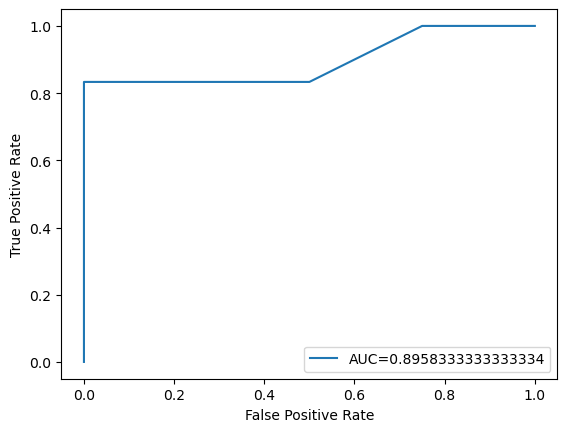

In [38]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [39]:
# Model evaluation - Data Split
x_train, x_test, y_train, y_test = train_test_split (scaled_data.iloc[:, :2], Y, 
                                                     test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = Y)

In [40]:
x_train.shape

(8, 2)

In [41]:
x_test.shape

(2, 2)

In [42]:
# Fitting Logistic Regression to the training set  
logisticmodel = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.345868
         Iterations 8


In [43]:
# Evaluate on train data
y_pred_train = logisticmodel.predict(x_train)  
y_pred_train

9    0.333251
7    0.794757
1    0.999440
8    0.202549
5    0.333251
4    0.938444
3    0.002146
2    0.938444
dtype: float64

In [44]:
# Metrics
# Filling all the cells with zeroes
y_train["pred"] = np.zeros(8)

In [45]:
# taking threshold value and above the prob value will be treated as correct value 
y_train.loc[pred > optimal_threshold, "pred"] = 1

In [46]:
auc = metrics.roc_auc_score(y_train["Result"], y_pred_train)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.866667


In [47]:
classification_train = classification_report(y_train["pred"], y_train["Result"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.60      1.00      0.75         3

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



In [48]:
# confusion matrix 
confusion_matrix(y_train["pred"], y_train["Result"])

array([[3, 2],
       [0, 3]], dtype=int64)

In [49]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train["pred"], y_train["Result"]))

Train accuracy =  0.75


In [50]:
# Validate on Test data
y_pred_test = logisticmodel.predict(x_test)  
y_pred_test

0    0.202549
6    0.997818
dtype: float64

In [51]:
# Filling all the cells with zeroes
y_test["y_pred_test"] = np.zeros(2)

In [52]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Result       2 non-null      int32  
 1   y_pred_test  2 non-null      float64
dtypes: float64(1), int32(1)
memory usage: 40.0 bytes


In [53]:
# Capturing the prediction binary values
y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1

In [54]:
# classification report
classification1 = classification_report(y_test["y_pred_test"], y_test["Result"])
print(classification1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [55]:
# confusion matrix 
confusion_matrix(y_test["y_pred_test"], y_test["Result"])

array([[1, 0],
       [0, 1]], dtype=int64)

In [56]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test["y_pred_test"], y_test["Result"]))

Test accuracy =  1.0
